In [1]:
from qiskit import *
import matplotlib
import numpy as np
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import *

In [35]:
q1 = QuantumRegister(1,"q1")
q2 = QuantumRegister(1,"q2")
c = ClassicalRegister(1,"c")

{'11': 509, '00': 515}


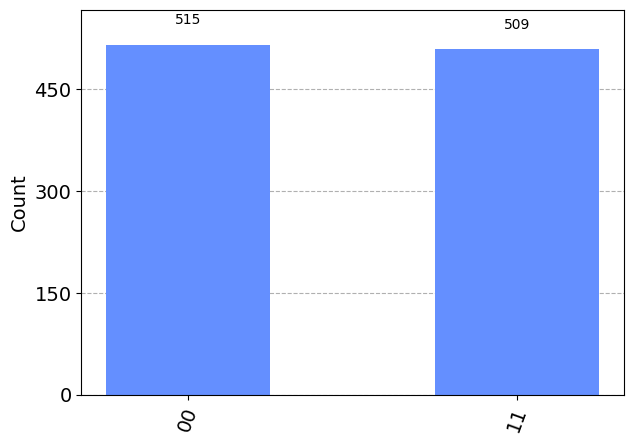

In [43]:
qc = QuantumCircuit(q1,q2)

qc.h(0)
qc.cx(0,1)
qc.measure_all()

qc.draw()

sim = AerSimulator()

job = execute(qc,sim,shots=1024)
result = job.result()
count = result.get_counts()

print(count)

plot_histogram(count)


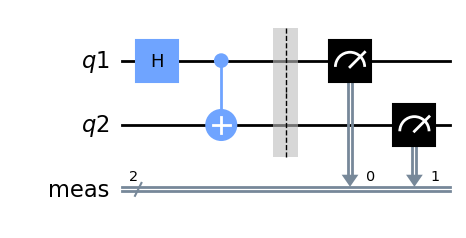

In [39]:
qc.draw()

In [2]:
#save_statevector() = 입력한 시점의 상태 벡터를 저장함

qc = QuantumCircuit(2,2)
qc.h(0)
qc.save_statevector()
qc.measure(0,0)
qc.measure(1,1)

sim = AerSimulator()

result = execute(qc,sim,shots = 1024).result()
sv = result.get_statevector()
print(sv)
count = result.get_counts()
print(count)

Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))
{'01': 503, '00': 521}


In [3]:
#unitary simulator = 양자 회로를 표현하는 유니터리 행렬을 계산하여 반환
#save_unitary = unitary simulator의 현재 상태를 저장함

sim_u = AerSimulator(method = 'unitary')
qc = QuantumCircuit(1)
qc.h(0)
qc.save_unitary()
result = execute(qc, sim_u).result()
U = result.get_unitary(decimals = 4)
print(U)

Operator([[ 0.7071+0.j,  0.7071-0.j],
          [ 0.7071+0.j, -0.7071+0.j]],
         input_dims=(2,), output_dims=(2,))


In [12]:
dev_list = provider.backends(
    filters = lambda x: x.configuration().n_qubits>=5,
    simulator = False)

In [13]:
from qiskit.providers.ibmq import *
dev = least_busy(dev_list)

In [14]:
from qiskit.providers.ibmq.job import job_monitor

#bell-circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

#state vector를 사용해 회로 가동
sim = AerSimulator()
result = execute(qc,sim,shots=1024).result()
count_sim = result.get_counts()

#실제 양자 머신으로 가동
job = execute(qc,dev,shots=1024)
job_monitor(job)

result = job.result()
count_dev = result.get_counts()

#결과 출력 / 비교
print(count_sim)
print(count_dev)

Job Status: job has successfully run               
{'11': 551, '00': 473}
{'01': 52, '10': 57, '00': 491, '11': 424}
